In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
font_path = "c:/Windows/fonts/malgun.ttf"
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = font_path).get_name()
plt.rc('font', family = font_name)
plt.rc('axes', unicode_minus=False)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore")

# 변수 모음집 
---
---
* 함수     
making_pivot : Category_Map 별 Selected_People 로 피봇을 만들어주는 코드 

---
---
 
* 데이터 프레임  

df : 통합 데이터 프레임     

---

tour : 관광분야 데이터 프레임    
tour_df : 관광분야를 [making_pivot] 을 이용한 데이터 프레임   

( 관광 총 5 개의 카테고리 존재 )
history : 역사 카테고리 데이터 프레임      
history_df : 역사 카테고리 를 [making_pivot] 을 이용한 데이터 프레임   
culture : 문화 카테고리 데이터 프레임   
culture_df : 문화 카테고리 를 [making_pivot] 을 이용한 데이터 프레임  
nature : 자연 카테고리 데이터 프레임  
nature_df : 자연 카테고리 를 [making_pivot] 을 이용한 데이터 프레임  
experience : 경험 카테고리 데이터 프레임    
experience_df : 경험 카테고리 를 [making_pivot] 을 이용한 데이터 프레임    
shop_etc : 기타 카테고리 데이터 프레임      
shop_etc_df : 기타 카테고리 를 [making_pivot] 을 이용한 데이터 프레임    

---

food : 음식점 데이터 프레임     
food_df : 음식점을 [making_pivot] 을 이용한 데이터 프레임     

( 음식점 총 6 개의 카테고리 존재)   
cafe : 카페 카테고리 데이터 프래임    
cafe_df : 카페 카테고리 를 [making_pivot] 을 이용한 데이터 프레임     
korean : 한식 카테고리 데이터 프래임     
korean_df : 힌식 카테고리 를 [making_pivot] 을 이용한 데이터 프레임     
chinese : 중식 카테고리 데이터 프래임     
chinese_df : 중식 카테고리 를 [making_pivot] 을 이용한 데이터 프레임     
west : 양식 카테고리 데이터 프레임   
west_df : 양식 카테고리 를 [making_pivot] 을 이용한 데이터 프레임     
japanese : 일식 카테고리 데이터 프레임   
japanese_df : 일식 카테고리 를 [making_pivot] 을 이용한 데이터 프레임     
etc : 기타 카테고리 데이터 프레임   
etc_df : 기타 카테고리 를 [making_pivot] 을 이용한 데이터 프레임     

---
---

* 변수  

# 0. 함수 모음집

In [2]:
def making_pivot(df):
    pivot_df = df.pivot_table(
        index='Attraction',
        columns='Category_Map',
        values='Selected_People',
        aggfunc='sum',  
        fill_value=0
    )

    first_values = df.groupby('Attraction').first()[['Participants', 'Address', 'Tag', 'Longitude', 'Latitude']]
    pivot_df = pivot_df.reset_index().merge(first_values, on='Attraction', how='left')
    
    return pivot_df

# 1. 데이터프레임 불러오기

In [3]:
path = './final_data_set_v2.csv'
df = pd.read_csv(path,index_col=0)
df.head(3)

,Attraction,Category,type,Category_Map,Category_Map_v2,Good_Point,Selected_People,Participants,Address,Tag,Longitude,Latitude
0,104고지전적비,관광,history,매력도,분위기,사진이 잘 나와요,91.0,203,서울특별시 서대문구 연희동 산100-1,#관광지#기념탑#역사#역사공부#역사관광지#역사를품은곳#역사문화재#역사속#역사속으로#...,126.926214,37.567794
1,104고지전적비,관광,history,매력도,활동,볼거리가 많아요,58.0,203,서울특별시 서대문구 연희동 산100-1,#관광지#기념탑#역사#역사공부#역사관광지#역사를품은곳#역사문화재#역사속#역사속으로#...,126.926214,37.567794
2,104고지전적비,관광,history,매력도,분위기,붐비지 않아요,40.0,203,서울특별시 서대문구 연희동 산100-1,#관광지#기념탑#역사#역사공부#역사관광지#역사를품은곳#역사문화재#역사속#역사속으로#...,126.926214,37.567794


In [4]:
df.shape

(15309, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15309 entries, 0 to 15411
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Attraction       15309 non-null  object 
 1   Category         15309 non-null  object 
 2   type             15309 non-null  object 
 3   Category_Map     15309 non-null  object 
 4   Category_Map_v2  15309 non-null  object 
 5   Good_Point       15309 non-null  object 
 6   Selected_People  15309 non-null  float64
 7   Participants     15309 non-null  object 
 8   Address          15309 non-null  object 
 9   Tag              15309 non-null  object 
 10  Longitude        15309 non-null  float64
 11  Latitude         15309 non-null  float64
dtypes: float64(3), object(9)
memory usage: 1.5+ MB


In [6]:
# Participants 유형 변경

# 문자열 데이터 타입에서 특수 문자를 제거하는 코드
df['Participants'] = df['Participants'].str.replace(pat=r'[^\w]', repl=r'', regex=True)

df['Participants'] = df['Participants'].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15309 entries, 0 to 15411
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Attraction       15309 non-null  object 
 1   Category         15309 non-null  object 
 2   type             15309 non-null  object 
 3   Category_Map     15309 non-null  object 
 4   Category_Map_v2  15309 non-null  object 
 5   Good_Point       15309 non-null  object 
 6   Selected_People  15309 non-null  float64
 7   Participants     15309 non-null  int32  
 8   Address          15309 non-null  object 
 9   Tag              15309 non-null  object 
 10  Longitude        15309 non-null  float64
 11  Latitude         15309 non-null  float64
dtypes: float64(3), int32(1), object(8)
memory usage: 1.5+ MB


# 1-2. 관광 카테고리별 데이터 프레임 나누기

In [8]:
tour = df[df['Category'] == '관광']
# tour.to_csv('./tour.csv')
tour.head(3)

,Attraction,Category,type,Category_Map,Category_Map_v2,Good_Point,Selected_People,Participants,Address,Tag,Longitude,Latitude
0,104고지전적비,관광,history,매력도,분위기,사진이 잘 나와요,91.0,203,서울특별시 서대문구 연희동 산100-1,#관광지#기념탑#역사#역사공부#역사관광지#역사를품은곳#역사문화재#역사속#역사속으로#...,126.926214,37.567794
1,104고지전적비,관광,history,매력도,활동,볼거리가 많아요,58.0,203,서울특별시 서대문구 연희동 산100-1,#관광지#기념탑#역사#역사공부#역사관광지#역사를품은곳#역사문화재#역사속#역사속으로#...,126.926214,37.567794
2,104고지전적비,관광,history,매력도,분위기,붐비지 않아요,40.0,203,서울특별시 서대문구 연희동 산100-1,#관광지#기념탑#역사#역사공부#역사관광지#역사를품은곳#역사문화재#역사속#역사속으로#...,126.926214,37.567794


In [9]:
tour_df = making_pivot(tour)
# tour_df.to_csv('./tour_df.csv')
tour_df.head(3)

,Attraction,만족도,매력도,편의,Participants,Address,Tag,Longitude,Latitude
0,104고지전적비,63.0,228.0,72.0,203,서울특별시 서대문구 연희동 산100-1,#관광지#기념탑#역사#역사공부#역사관광지#역사를품은곳#역사문화재#역사속#역사속으로#...,126.926214,37.567794
1,10꼬르소꼬모 청담점,68.0,55.0,66.0,76,"서울특별시 강남구 압구정로 416 (청담동) 1층, 2층",#10꼬르소꼬모#10꼬르소꼬모청담점#강남브런치카페#쇼핑#음식#청담동카페#청담동편집숍...,127.042493,37.527056
2,63아트,82.0,275.0,156.0,252,서울특별시 영등포구 63로 50,#63빌딩전시관#63빌딩전시회#63스퀘어#63아트#경치좋은곳#문화공간#문화시설#문화...,126.940253,37.520002


In [10]:
tour_df.shape

(336, 9)

In [11]:
tour['type'].unique()

array(['history', 'shop_etc', 'culture', 'nature / experience', 'theme',
       'nature / theme', 'nature', 'experience', 'history / shop_etc',
       'history / experience / culture', 'nature / history',
       'history / experience / theme', 'nature / history / shop_etc',
       'history / theme', 'history / culture', 'history / experience',
       'experience / shop_etc', 'experience / theme',
       'experience / culture', 'culture / shop_etc'], dtype=object)

In [12]:
history = tour[tour['type'].str.contains('history')]
# history.to_csv('./history.csv')
history.head(3)

,Attraction,Category,type,Category_Map,Category_Map_v2,Good_Point,Selected_People,Participants,Address,Tag,Longitude,Latitude
0,104고지전적비,관광,history,매력도,분위기,사진이 잘 나와요,91.0,203,서울특별시 서대문구 연희동 산100-1,#관광지#기념탑#역사#역사공부#역사관광지#역사를품은곳#역사문화재#역사속#역사속으로#...,126.926214,37.567794
1,104고지전적비,관광,history,매력도,활동,볼거리가 많아요,58.0,203,서울특별시 서대문구 연희동 산100-1,#관광지#기념탑#역사#역사공부#역사관광지#역사를품은곳#역사문화재#역사속#역사속으로#...,126.926214,37.567794
2,104고지전적비,관광,history,매력도,분위기,붐비지 않아요,40.0,203,서울특별시 서대문구 연희동 산100-1,#관광지#기념탑#역사#역사공부#역사관광지#역사를품은곳#역사문화재#역사속#역사속으로#...,126.926214,37.567794


In [13]:
history_df = making_pivot(history)
# history_df.to_csv('./history_df.csv')
history_df.head(3)

,Attraction,만족도,매력도,편의,Participants,Address,Tag,Longitude,Latitude
0,104고지전적비,63.0,228.0,72.0,203,서울특별시 서대문구 연희동 산100-1,#관광지#기념탑#역사#역사공부#역사관광지#역사를품은곳#역사문화재#역사속#역사속으로#...,126.926214,37.567794
1,간송미술관,14.0,15.0,3.0,16,서울 성북구 성북로 102-11 간송미술관,#가족과함께#문화공간#문화시설#문화예술#문화예술공간#복합문화공간#아이와함께#연인과함...,126.996905,37.593660
2,경복궁,279.0,2173.0,821.0,1202,서울특별시 종로구 사직로 161 경복궁,#15_16한국관광100선#17_18한국관광100선#19_20한국관광100선#202...,126.977016,37.578841


In [14]:
culture = tour[tour['type'].str.contains('culture')]
# culture.to_csv('./culture.csv')
culture.head(3)

,Attraction,Category,type,Category_Map,Category_Map_v2,Good_Point,Selected_People,Participants,Address,Tag,Longitude,Latitude
29,63아트,관광,culture,매력도,활동,볼거리가 많아요,114.0,252,서울특별시 영등포구 63로 50,#63빌딩전시관#63빌딩전시회#63스퀘어#63아트#경치좋은곳#문화공간#문화시설#문화...,126.940253,37.520002
30,63아트,관광,culture,매력도,분위기,사진이 잘 나와요,89.0,252,서울특별시 영등포구 63로 50,#63빌딩전시관#63빌딩전시회#63스퀘어#63아트#경치좋은곳#문화공간#문화시설#문화...,126.940253,37.520002
31,63아트,관광,culture,편의,접근성,주차하기 편해요,57.0,252,서울특별시 영등포구 63로 50,#63빌딩전시관#63빌딩전시회#63스퀘어#63아트#경치좋은곳#문화공간#문화시설#문화...,126.940253,37.520002


In [15]:
culture_df = making_pivot(culture)
# culture_df.to_csv('./culture_df.csv')
culture_df.head(3)

,Attraction,만족도,매력도,편의,Participants,Address,Tag,Longitude,Latitude
0,63아트,82.0,275.0,156.0,252,서울특별시 영등포구 63로 50,#63빌딩전시관#63빌딩전시회#63스퀘어#63아트#경치좋은곳#문화공간#문화시설#문화...,126.940253,37.520002
1,KCDF 갤러리숍 공예정원,21.0,25.0,13.0,24,서울특별시 종로구 인사동11길 8,#갤러리숍#공예#공예품#디자인#디자인상품#쇼핑,126.984095,37.574037
2,가회민화박물관,13.0,17.0,3.0,17,서울특별시 종로구 북촌로 52,#가족여행#남녀노소#문화시설#문화예술#문화예술공간#민화#박물관#서울시#아이와함께#열...,126.985237,37.581492


In [16]:
nature = tour[tour['type'].str.contains('nature')]
# nature.to_csv('./nature.csv')
nature.head(3)

,Attraction,Category,type,Category_Map,Category_Map_v2,Good_Point,Selected_People,Participants,Address,Tag,Longitude,Latitude
84,강동그린웨이 가족캠핑장,관광,nature / experience,편의,시설,깨끗해요,50.0,101,서울특별시 강동구 천호대로206길 87,#가족여행#강동구#레포츠#자연환경#주말여행#캠핑장#힐링여행,127.152094,37.536255
85,강동그린웨이 가족캠핑장,관광,nature / experience,편의,시설,화장실이 잘 되어있어요,39.0,101,서울특별시 강동구 천호대로206길 87,#가족여행#강동구#레포츠#자연환경#주말여행#캠핑장#힐링여행,127.152094,37.536255
86,강동그린웨이 가족캠핑장,관광,nature / experience,편의,시설,개수대가 잘 되어있어요,34.0,101,서울특별시 강동구 천호대로206길 87,#가족여행#강동구#레포츠#자연환경#주말여행#캠핑장#힐링여행,127.152094,37.536255


In [17]:
nature_df = making_pivot(nature)
# nature_df.to_csv('./nature_df.csv')
nature_df.head(3)

,Attraction,만족도,매력도,편의,Participants,Address,Tag,Longitude,Latitude
0,강동그린웨이 가족캠핑장,5.0,39.0,235.0,101,서울특별시 강동구 천호대로206길 87,#가족여행#강동구#레포츠#자연환경#주말여행#캠핑장#힐링여행,127.152094,37.536255
1,경의선숲길,0.0,110.0,86.0,53,서울특별시 마포구 연남동,#경의선숲길#데이트명소#데이트코스#도심산책#레포츠#마포구#산책코스#연남동#연트럴파크...,126.922982,37.561957
2,경춘선숲길,2.0,64.0,41.0,23,서울특별시 노원구 공릉동 272-2,#걷기좋은길#경춘선#관광지#레포츠#산책하기좋은곳#서울데이트장소#숲길#연인과함께#친구와함께,127.080125,37.619923


In [18]:
experience = tour[tour['type'].str.contains('experience')]
# experience.to_csv('./experience.csv')
experience.head(3)

,Attraction,Category,type,Category_Map,Category_Map_v2,Good_Point,Selected_People,Participants,Address,Tag,Longitude,Latitude
84,강동그린웨이 가족캠핑장,관광,nature / experience,편의,시설,깨끗해요,50.0,101,서울특별시 강동구 천호대로206길 87,#가족여행#강동구#레포츠#자연환경#주말여행#캠핑장#힐링여행,127.152094,37.536255
85,강동그린웨이 가족캠핑장,관광,nature / experience,편의,시설,화장실이 잘 되어있어요,39.0,101,서울특별시 강동구 천호대로206길 87,#가족여행#강동구#레포츠#자연환경#주말여행#캠핑장#힐링여행,127.152094,37.536255
86,강동그린웨이 가족캠핑장,관광,nature / experience,편의,시설,개수대가 잘 되어있어요,34.0,101,서울특별시 강동구 천호대로206길 87,#가족여행#강동구#레포츠#자연환경#주말여행#캠핑장#힐링여행,127.152094,37.536255


In [19]:
experience_df = making_pivot(experience)
# experience_df.to_csv('./experience_df.csv')
experience_df.head(3)

,Attraction,만족도,매력도,편의,Participants,Address,Tag,Longitude,Latitude
0,강동그린웨이 가족캠핑장,5.0,39.0,235.0,101,서울특별시 강동구 천호대로206길 87,#가족여행#강동구#레포츠#자연환경#주말여행#캠핑장#힐링여행,127.152094,37.536255
1,고궁마실,208.0,227.0,72.0,123,서울특별시 종로구 창경궁로 229 한성빌딩 3층,#쇼핑#창경궁#한복대여점#한복체험,126.997923,37.582540
2,골든블루마리나,1504.0,780.0,203.0,780,서울특별시 서초구 올림픽대로 2085-14 세빛섬 골든블루마리나,#골든블루마리나#레포츠#세빛섬#요트체험,126.994818,37.511618


In [20]:
theme = tour[tour['type'].str.contains('theme')]
# theme.to_csv('./theme.csv')
theme.head(3)

,Attraction,Category,type,Category_Map,Category_Map_v2,Good_Point,Selected_People,Participants,Address,Tag,Longitude,Latitude
103,강변스파랜드,관광,theme,편의,시설,규모가 커요,311.0,452,서울특별시 광진구 구의강변로 45 지하2층,#강변스파랜드#강변역사우나#강변역찜질방#관광지#불한증막#사우나#서울24시찜질방#서울...,127.091331,37.534922
104,강변스파랜드,관광,theme,편의,시설,시설이 깔끔해요,222.0,452,서울특별시 광진구 구의강변로 45 지하2층,#강변스파랜드#강변역사우나#강변역찜질방#관광지#불한증막#사우나#서울24시찜질방#서울...,127.091331,37.534922
105,강변스파랜드,관광,theme,만족도,서비스,친절해요,145.0,452,서울특별시 광진구 구의강변로 45 지하2층,#강변스파랜드#강변역사우나#강변역찜질방#관광지#불한증막#사우나#서울24시찜질방#서울...,127.091331,37.534922


In [21]:
theme_df = making_pivot(theme)
# theme_df.to_csv('./theme_df.csv')
theme_df.head(3)

,Attraction,만족도,매력도,편의,Participants,Address,Tag,Longitude,Latitude
0,N서울타워,276.0,9147.0,2787.0,5100,서울특별시 용산구 남산공원길 105,#19_20한국관광100선#2024_여행가는달과함께하는_발도장여행지#21_22한국관...,126.988247,37.551217
1,강변스파랜드,218.0,114.0,964.0,452,서울특별시 광진구 구의강변로 45 지하2층,#강변스파랜드#강변역사우나#강변역찜질방#관광지#불한증막#사우나#서울24시찜질방#서울...,127.091331,37.534922
2,경의선숲길,0.0,110.0,86.0,53,서울특별시 마포구 연남동,#경의선숲길#데이트명소#데이트코스#도심산책#레포츠#마포구#산책코스#연남동#연트럴파크...,126.922982,37.561957


In [22]:
shop_etc = tour[tour['type'].str.contains('shop_etc')]
# shop_etc.to_csv('./shop_etc.csv')
shop_etc.head(3)

,Attraction,Category,type,Category_Map,Category_Map_v2,Good_Point,Selected_People,Participants,Address,Tag,Longitude,Latitude
14,10꼬르소꼬모 청담점,관광,shop_etc,편의,시설,종류가 다양해요,38.0,76,"서울특별시 강남구 압구정로 416 (청담동) 1층, 2층",#10꼬르소꼬모#10꼬르소꼬모청담점#강남브런치카페#쇼핑#음식#청담동카페#청담동편집숍...,127.042493,37.527056
15,10꼬르소꼬모 청담점,관광,shop_etc,매력도,분위기,독특한 디자인이 많아요,32.0,76,"서울특별시 강남구 압구정로 416 (청담동) 1층, 2층",#10꼬르소꼬모#10꼬르소꼬모청담점#강남브런치카페#쇼핑#음식#청담동카페#청담동편집숍...,127.042493,37.527056
16,10꼬르소꼬모 청담점,관광,shop_etc,만족도,서비스,친절해요,29.0,76,"서울특별시 강남구 압구정로 416 (청담동) 1층, 2층",#10꼬르소꼬모#10꼬르소꼬모청담점#강남브런치카페#쇼핑#음식#청담동카페#청담동편집숍...,127.042493,37.527056


In [23]:
shop_etc_df = making_pivot(shop_etc)
# shop_etc_df.to_csv('./shop_etc_df.csv')
shop_etc_df.head(3)

,Attraction,만족도,매력도,편의,Participants,Address,Tag,Longitude,Latitude
0,10꼬르소꼬모 청담점,68.0,55.0,66.0,76,"서울특별시 강남구 압구정로 416 (청담동) 1층, 2층",#10꼬르소꼬모#10꼬르소꼬모청담점#강남브런치카페#쇼핑#음식#청담동카페#청담동편집숍...,127.042493,37.527056
1,AK PLAZA 홍대,575.0,303.0,471.0,756,서울특별시 마포구 양화로 188,#2024_여행가는달과함께하는_발도장여행지#AK&홍대#쇼핑#홍대쇼핑몰,126.926095,37.558187
2,IFC몰,1608.0,513.0,1854.0,1986,서울특별시 영등포구 여의도동 국제금융로 10 서울 국제금융 센터,#IFC몰#복합쇼핑몰#쇼핑#수도권#여의도대형쇼핑몰#여의도복합쇼핑몰#여의도쇼핑#여의도...,126.925583,37.524850


# 1-3. 음식점 카테고리별로 나누기

In [24]:
food = df[df['Category'] == '음식']
# food.to_csv('./food.csv')
food.head(3)

,Attraction,Category,type,Category_Map,Category_Map_v2,Good_Point,Selected_People,Participants,Address,Tag,Longitude,Latitude
4893,채그로,음식,cafe,시설 및 분위기,시설 및 환경,뷰가 좋아요,146.0,201,서울특별시 마포구 마포대로4다길 31,#독서#마포구가볼만한곳#복합문화시설#북카페#서울#쇼핑#채그로#책#힐링공간,126.944219,37.535689
4894,채그로,음식,cafe,시설 및 분위기,분위기,집중하기 좋아요,62.0,201,서울특별시 마포구 마포대로4다길 31,#독서#마포구가볼만한곳#복합문화시설#북카페#서울#쇼핑#채그로#책#힐링공간,126.944219,37.535689
4895,채그로,음식,cafe,시설 및 분위기,특별한 목적,읽을만한 책이 많아요,61.0,201,서울특별시 마포구 마포대로4다길 31,#독서#마포구가볼만한곳#복합문화시설#북카페#서울#쇼핑#채그로#책#힐링공간,126.944219,37.535689


In [25]:
food['type'].unique()

array(['cafe', 'korean', 'chinese', 'west', 'japanese', 'etc'],
      dtype=object)

In [26]:
food_df = making_pivot(food)
food_df.to_csv('./food_df.csv')

In [27]:
cafe = food[food['type'] == 'cafe']
# cafe.to_csv('./cafe.csv')
cafe.head(3)

,Attraction,Category,type,Category_Map,Category_Map_v2,Good_Point,Selected_People,Participants,Address,Tag,Longitude,Latitude
4893,채그로,음식,cafe,시설 및 분위기,시설 및 환경,뷰가 좋아요,146.0,201,서울특별시 마포구 마포대로4다길 31,#독서#마포구가볼만한곳#복합문화시설#북카페#서울#쇼핑#채그로#책#힐링공간,126.944219,37.535689
4894,채그로,음식,cafe,시설 및 분위기,분위기,집중하기 좋아요,62.0,201,서울특별시 마포구 마포대로4다길 31,#독서#마포구가볼만한곳#복합문화시설#북카페#서울#쇼핑#채그로#책#힐링공간,126.944219,37.535689
4895,채그로,음식,cafe,시설 및 분위기,특별한 목적,읽을만한 책이 많아요,61.0,201,서울특별시 마포구 마포대로4다길 31,#독서#마포구가볼만한곳#복합문화시설#북카페#서울#쇼핑#채그로#책#힐링공간,126.944219,37.535689


In [28]:
cafe_df = making_pivot(cafe)
# cafe_df.to_csv('./cafe_df.csv')
cafe_df.head(3)

,Attraction,가격 및 가치,서비스,시설 및 분위기,음식의 속성,Participants,Address,Tag,Longitude,Latitude
0,RSG 성수,0.0,2.0,17.0,13.0,12,서울특별시 성동구 연무장15길 11 C동 110호,#RSG#RSG성수#라이더성지#라이더카페#라이딩편집숍#서울라이더성지#음식,127.059921,37.542477
1,감꽃당,78.0,573.0,1839.0,2453.0,2192,서울특별시 종로구 돈화문로11다길 38,#디저트맛집#사진찍기좋은곳#에그타르트#연인과함께#음식#종로카페#휴식공간#휴식여행#휴...,126.990102,37.573804
2,강남구 카페엠,11.0,57.0,382.0,214.0,179,서울특별시 강남구 삼성로 634 1층,#분위기_좋은#유기농아이스크림#음식#플랜테리어#플랜테리어카페,127.051699,37.516588


In [29]:
korean = food[food['type'] == 'korean']
# korean.to_csv('./korean.csv')
korean.head(3)

,Attraction,Category,type,Category_Map,Category_Map_v2,Good_Point,Selected_People,Participants,Address,Tag,Longitude,Latitude
4913,소소한 풍경,음식,korean,음식의 속성,음식의 맛과 질,음식이 맛있어요,367.0,453,서울특별시 종로구 자하문로40길 75,#맛집#부암동맛집#부암동소소한풍경#부암동전망좋은식당#부암동한정식#소소한풍경#음식#전...,126.965977,37.593724
4914,소소한 풍경,음식,korean,음식의 속성,음식의 다양성,특별한 메뉴가 있어요,171.0,453,서울특별시 종로구 자하문로40길 75,#맛집#부암동맛집#부암동소소한풍경#부암동전망좋은식당#부암동한정식#소소한풍경#음식#전...,126.965977,37.593724
4915,소소한 풍경,음식,korean,서비스,서비스,친절해요,150.0,453,서울특별시 종로구 자하문로40길 75,#맛집#부암동맛집#부암동소소한풍경#부암동전망좋은식당#부암동한정식#소소한풍경#음식#전...,126.965977,37.593724


In [30]:
korean_df = making_pivot(korean)
# korean_df.to_csv('./korean_df.csv')
korean_df.head(3)

,Attraction,가격 및 가치,서비스,시설 및 분위기,음식의 속성,Participants,Address,Tag,Longitude,Latitude
0,BK볏짚 우대갈비 장안동본점,62.0,285.0,551.0,887.0,526,서울특별시 동대문구 장한로26가길 29 1층 BK볏짚 우대갈비 장안동본점,#BK볏짚 우대갈비 장안동본점#동대문맛집#동대문맛집#비케이우대갈비#우대갈비맛집#음식...,127.071611,37.570591
1,갈비명가이상 돈암본관,113.0,452.0,1456.0,1958.0,1251,서울특별시 성북구 정릉로 364,#갈비명가이상돈암본관#길음역맛집#돈암갈비맛집#서울갈비맛집#음식#이상갈비#이상갈비,127.023611,37.601531
2,감나무집기사식당,532.0,701.0,1316.0,3036.0,1972,서울특별시 마포구 연남로 25,#감나무집기사식당#연남동24시간집밥#연남동돼지불백#연남동백반#연남동집밥#음식,126.922126,37.561717


In [31]:
chinese = food[food['type'] == 'chinese']
# chinese.to_csv('./chinese.csv')
chinese.head(3)

,Attraction,Category,type,Category_Map,Category_Map_v2,Good_Point,Selected_People,Participants,Address,Tag,Longitude,Latitude
5545,샤오바오우육면 종로본점,음식,chinese,음식의 속성,음식의 맛과 질,음식이 맛있어요,3791.0,4090,서울특별시 종로구 삼일대로17길 15,#샤오바오본점#수타우육면#음식#종각샤오바오#종각우육면맛집,126.986641,37.56914
5546,샤오바오우육면 종로본점,음식,chinese,음식의 속성,음식의 다양성,특별한 메뉴가 있어요,1579.0,4090,서울특별시 종로구 삼일대로17길 15,#샤오바오본점#수타우육면#음식#종각샤오바오#종각우육면맛집,126.986641,37.56914
5547,샤오바오우육면 종로본점,음식,chinese,음식의 속성,음식의 맛과 질,양이 많아요,1325.0,4090,서울특별시 종로구 삼일대로17길 15,#샤오바오본점#수타우육면#음식#종각샤오바오#종각우육면맛집,126.986641,37.56914


In [32]:
chinese_df = making_pivot(chinese)
# chinese_df.to_csv('./chinese_df.csv')
chinese_df.head(3)

,Attraction,가격 및 가치,서비스,시설 및 분위기,음식의 속성,Participants,Address,Tag,Longitude,Latitude
0,1940금문,6.0,43.0,79.0,210.0,122,서울특별시 종로구 창경궁로 269-1 1940금문,#1940금문#금문#대학로노포맛집#대학로자장면#맛있는녀석들시청자추천맛집#맛있는녀석들...,127.000610,37.585407
1,강서도일처,34.0,166.0,426.0,837.0,578,서울특별시 강서구 개화동로 567,#도일처#동파육#맛집#서울맛집#수도권#음식#중식#짜장면,126.807699,37.561965
2,개화,56.0,147.0,288.0,528.0,381,서울특별시 서초구 동작대로 86 동주빌딩 지하1층,#맛집#음식#짜장면#탕수육,126.981850,37.562117


In [33]:
west = food[food['type'] == 'west']
# west.to_csv('./west.csv')
west.head(3)

,Attraction,Category,type,Category_Map,Category_Map_v2,Good_Point,Selected_People,Participants,Address,Tag,Longitude,Latitude
5844,울프강스테이크하우스,음식,west,음식의 속성,음식의 맛과 질,음식이 맛있어요,2690.0,3550,서울특별시 강남구 선릉로152길 21 영인빌딩 1층,#가족식사_추천#맛집#울프강_샐러드#음식#클래식_버거#포터하우스_스테이크,127.041409,37.524421
5845,울프강스테이크하우스,음식,west,시설 및 분위기,분위기,특별한 날 가기 좋아요,1870.0,3550,서울특별시 강남구 선릉로152길 21 영인빌딩 1층,#가족식사_추천#맛집#울프강_샐러드#음식#클래식_버거#포터하우스_스테이크,127.041409,37.524421
5846,울프강스테이크하우스,음식,west,서비스,서비스,친절해요,1665.0,3550,서울특별시 강남구 선릉로152길 21 영인빌딩 1층,#가족식사_추천#맛집#울프강_샐러드#음식#클래식_버거#포터하우스_스테이크,127.041409,37.524421


In [34]:
west_df = making_pivot(west)
# west_df.to_csv('./west_df.csv')
west_df.head(3)

,Attraction,가격 및 가치,서비스,시설 및 분위기,음식의 속성,Participants,Address,Tag,Longitude,Latitude
0,h450,62.0,88.0,300.0,397.0,260,서울특별시 강남구 압구정로29길 21 문화센터 건물 1층,#강남레스토랑#강남맛집#강남여행#서양식#스테이크#식품의약품안전처_음식점위생등급_매우...,127.027618,37.528667
1,갓잇(god eat),155.0,549.0,826.0,2369.0,1396,서울특별시 종로구 북촌로2길 5-5 1층,#강남구#맛집#멕시코요리#브리또#음식#타코,126.985964,37.578167
2,그릭조이,21.0,43.0,51.0,198.0,92,서울특별시 마포구 성지1길 6 2층,#그리스음식#레스토랑#마포구맛집#맛집#미코노스#분위기_좋은#서울맛집추천#아테네#음식...,126.913764,37.548229


In [35]:
japanese = food[food['type'] == 'japanese']
# japanese.to_csv('./japanese.csv')
japanese.head(3)

,Attraction,Category,type,Category_Map,Category_Map_v2,Good_Point,Selected_People,Participants,Address,Tag,Longitude,Latitude
6233,키누카누,음식,japanese,음식의 속성,음식의 맛과 질,음식이 맛있어요,2341.0,3086,"서울특별시 강서구 공항대로 247 퀸즈파크나인 b103, b104호",#발산역맛집#발산역스시#음식#초밥뷔페#키누카누#키누카누발산역,126.834696,37.559273
6234,키누카누,음식,japanese,시설 및 분위기,시설 및 환경,매장이 넓어요,1496.0,3086,"서울특별시 강서구 공항대로 247 퀸즈파크나인 b103, b104호",#발산역맛집#발산역스시#음식#초밥뷔페#키누카누#키누카누발산역,126.834696,37.559273
6235,키누카누,음식,japanese,가격 및 가치,가격과 가치,가성비가 좋아요,1060.0,3086,"서울특별시 강서구 공항대로 247 퀸즈파크나인 b103, b104호",#발산역맛집#발산역스시#음식#초밥뷔페#키누카누#키누카누발산역,126.834696,37.559273


In [36]:
japanese_df = making_pivot(japanese)
# japanese_df.to_csv('./japanese_df.csv')
japanese_df.head(3)

,Attraction,가격 및 가치,서비스,시설 및 분위기,음식의 속성,Participants,Address,Tag,Longitude,Latitude
0,까사빠보 신세계백화점본점,54.0,330.0,927.0,756.0,777,서울특별시 중구 소공로 63 본관 6층,#민물장어덮밥#서울중구맛집#식품의약품안전처_음식점위생등급_매우우수(2017년)#음식...,126.980958,37.560990
1,니와,8.0,22.0,43.0,130.0,108,서울특별시 용산구 이촌로75길 22 1,#남녀노소#니와#맛집#서울맛집#수도권#오코노미야끼#음식#일식#일식맛집#친구와함께#타코야끼,126.974583,37.520749
2,동경,110.0,190.0,496.0,1076.0,1051,서울특별시 강남구 봉은사로 524 코엑스몰 지하1층 J108,#광화문돈가스#광화문우동맛집#동경#세종문화회관맛집#음식,126.975712,37.571383


In [37]:
etc = food[food['type'] == 'etc']
# etc.to_csv('./etc.csv')
etc.head(3)

,Attraction,Category,type,Category_Map,Category_Map_v2,Good_Point,Selected_People,Participants,Address,Tag,Longitude,Latitude
6713,페르시안궁전,음식,etc,음식의 속성,음식의 맛과 질,음식이 맛있어요,2124.0,2370,서울특별시 종로구 성균관로6길 9,#맛집#서울맛집추천#음식#인도음식#종로맛집#카레라이스#탄두리난#통닭카레정식#페르시안케밥,126.997359,37.584872
6714,페르시안궁전,음식,etc,시설 및 분위기,시설 및 환경,인테리어가 멋져요,1388.0,2370,서울특별시 종로구 성균관로6길 9,#맛집#서울맛집추천#음식#인도음식#종로맛집#카레라이스#탄두리난#통닭카레정식#페르시안케밥,126.997359,37.584872
6715,페르시안궁전,음식,etc,서비스,서비스,친절해요,1155.0,2370,서울특별시 종로구 성균관로6길 9,#맛집#서울맛집추천#음식#인도음식#종로맛집#카레라이스#탄두리난#통닭카레정식#페르시안케밥,126.997359,37.584872


In [38]:
etc_df = making_pivot(etc)
# etc_df.to_csv('./etc_df.csv')
etc_df.head(3)

,Attraction,가격 및 가치,서비스,시설 및 분위기,음식의 속성,Participants,Address,Tag,Longitude,Latitude
0,63뷔페 파빌리온,2372.0,1974.0,7101.0,6137.0,4359,"서울특별시 영등포구 63로 50 한화금융센터63,GF",#63빌딩#63빌딩파빌리온#맛집#뷔페식#송년모임#연말모임#음식#파빌리온,126.939587,37.519808
1,WANGTHAI,31.0,173.0,342.0,567.0,324,서울특별시 용산구 이태원로 151,#맛집#분위기_좋은#얌꿍#얌운센#음식#이국적인#팟타이가이,126.990646,37.534500
2,그리츠 레스토랑,2204.0,1075.0,2931.0,3108.0,2372,서울특별시 영등포구 의사당대로 16 로비층,#뷔페#식품의약품안전처_음식점위생등급_매우우수(2017년)#영등포맛집#음식#음식점위생등급,126.917313,37.527516


---

In [39]:
# 각 관광지 유형별 수
print('관광 : ', len(tour_df))
print('역사 : ', len(history_df))
print('문화 : ', len(culture_df))
print('쇼핑 및 기타 : ', len(shop_etc_df))
print('자연 : ', len(nature_df))
print('테마 : ', len(theme_df))
print('체험 : ', len(experience_df))
print('음식 : ', len(food_df))
print('한식 : ', len(korean_df))
print('중식 : ', len(chinese_df))
print('일식 : ', len(japanese_df))
print('양식 : ', len(west_df))
print('카페 : ', len(cafe_df))
print('기타 : ', len(etc_df))

관광 :  336
역사 :  82
문화 :  17
쇼핑 및 기타 :  122
자연 :  82
테마 :  26
체험 :  40
음식 :  449
한식 :  286
중식 :  29
일식 :  17
양식 :  43
카페 :  55
기타 :  19


# 관광지 분류 전처리

## 1. Boxplot & IQR
- 리뷰 참여자수에 따른 그룹화 시도
- boxplot을 그려 upper 이상치 데이터 / 사분위수 내 데이터 / lower 이상치 3개의 그룹으로 그룹화 시도

Category '관광' 시도

{'whiskers': [<matplotlib.lines.Line2D at 0x1c309b45660>,
 'caps': [<matplotlib.lines.Line2D at 0x1c309b45ba0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c309b45480>],
 'medians': [<matplotlib.lines.Line2D at 0x1c309b460e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c309b46380>],
 'means': []}

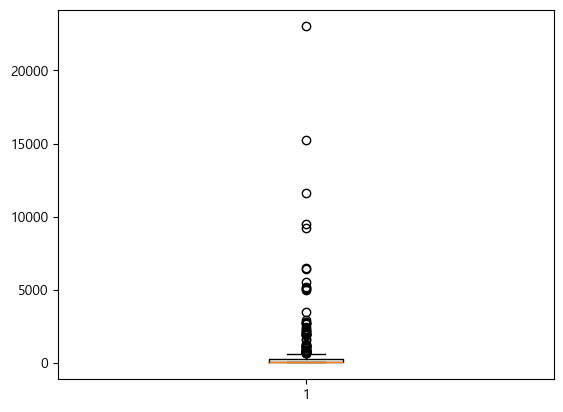

In [40]:
plt.boxplot(tour_df['Participants'])
# min과 max의 격차가 너무 심함

Participants 기준 upper 이상치 데이터 / 사분위수 내 데이터 / lower 이상치 3개의 그룹으로 그룹화

In [41]:
tour_df.describe()

,만족도,매력도,편의,Participants,Longitude,Latitude
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,335.154762,743.196429,526.241071,600.196429,126.993227,37.553745
std,855.015573,3588.258759,1623.524886,1968.139280,0.077525,0.042774
min,0.000000,0.000000,0.000000,10.000000,126.808552,37.426940
25%,5.750000,22.750000,18.000000,25.500000,126.956635,37.523378
50%,33.000000,67.500000,53.000000,70.500000,126.986403,37.559517
75%,143.500000,276.750000,186.250000,266.000000,127.036135,37.573401
max,6388.000000,50037.000000,12165.000000,23013.000000,127.608918,37.783068


In [42]:
# 조건 설정
condition_upper1 = tour_df['Participants'] > 266
condition_middle1 = (tour_df['Participants'] <= 266) & (tour_df['Participants'] >= 25.5)
condition_lower1 = tour_df['Participants'] < 25.5

In [43]:
# upper 이상치
tour_df_upper = tour_df[condition_upper1]
tour_df_upper.shape

(83, 9)

In [44]:
# middle 중간
tour_df_middle = tour_df[condition_middle1]
tour_df_middle.shape

(169, 9)

In [45]:
# lower 이상치
tour_df_lower = tour_df[condition_lower1]
tour_df_lower.shape

(84, 9)

- upper >> 83개
- middle >> 169개
- lower >> 84개

In [46]:
# 분배 개수 확인
print(len(tour_df))
print(len(tour_df_upper) + len(tour_df_middle) + len(tour_df_lower))

336
336


각 그룹별 boxplot 시각화

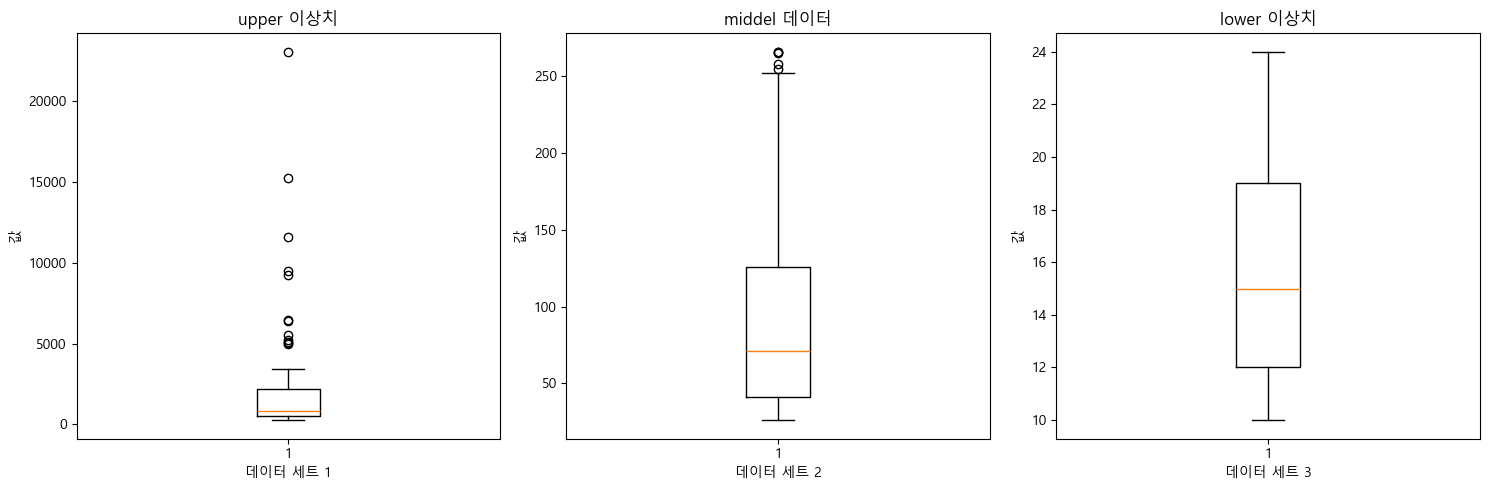

In [47]:
# 서브플롯 생성 (1행 3열)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# 각 서브플롯에 박스플롯 그리기
axes[0].boxplot(tour_df_upper['Participants'])
axes[0].set_title('upper 이상치')
axes[0].set_xlabel('데이터 세트 1')
axes[0].set_ylabel('값')

axes[1].boxplot(tour_df_middle['Participants'])
axes[1].set_title('middel 데이터')
axes[1].set_xlabel('데이터 세트 2')
axes[1].set_ylabel('값')

axes[2].boxplot(tour_df_lower['Participants'])
axes[2].set_title('lower 이상치')
axes[2].set_xlabel('데이터 세트 3')
axes[2].set_ylabel('값')

# 서브플롯 간 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()


- upper 이상치를 제외하고는 이상치 처리가 잘 된것 같다
- upper 이상치는 여전히 격차가 심해서 이상치가 많이 존재함 >> upper만 로그 정규화 적용 시도 해볼 필요있음

Category '음식' 시도

{'whiskers': [<matplotlib.lines.Line2D at 0x1c30a061b40>,
 'caps': [<matplotlib.lines.Line2D at 0x1c30a062080>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c30a0618a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c30a0625c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c30a062860>],
 'means': []}

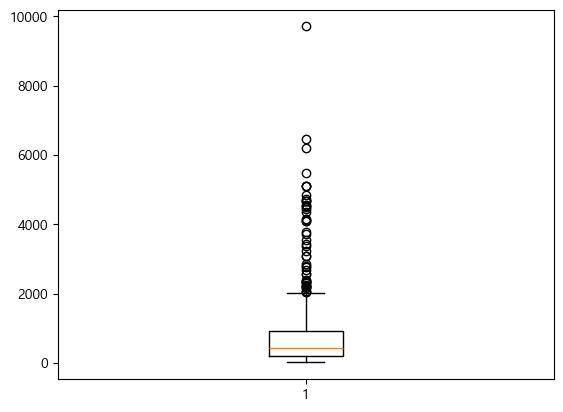

In [48]:
plt.boxplot(food_df['Participants'])

In [49]:
food_df.describe()

,가격 및 가치,서비스,시설 및 분위기,음식의 속성,Participants,Longitude,Latitude
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,143.102450,228.438753,724.026726,1271.122494,850.988864,126.995284,37.542112
std,271.191803,286.814013,1242.363854,1807.458753,1183.385659,0.063912,0.166011
min,0.000000,2.000000,6.000000,10.000000,10.000000,126.723459,35.147194
25%,23.000000,62.000000,122.000000,258.000000,194.000000,126.974513,37.525021
50%,50.000000,137.000000,310.000000,631.000000,421.000000,126.988095,37.562117
75%,138.000000,263.000000,790.000000,1379.000000,931.000000,127.023578,37.573820
max,2372.000000,1974.000000,10410.000000,15718.000000,9707.000000,127.578285,37.687810


In [50]:
# 조건 설정
condition_upper2 = (food_df['Participants'] > 931)
condition_middle2 = (food_df['Participants'] <= 931) & (food_df['Participants'] >= 194)
condition_lower2 = (food_df['Participants'] < 194)

In [51]:
# upper 이상치
food_df_upper = food_df[condition_upper2]
food_df_upper.shape

(112, 10)

In [52]:
# middle 중간
food_df_middle = food_df[condition_middle2]
food_df_middle.shape

(225, 10)

In [53]:
# lower 이상치
food_df_lower = food_df[condition_lower2]
food_df_lower.shape

(112, 10)

In [54]:
print(len(food_df))
print(len(food_df_upper) + len(food_df_middle) + len(food_df_lower))

449
449


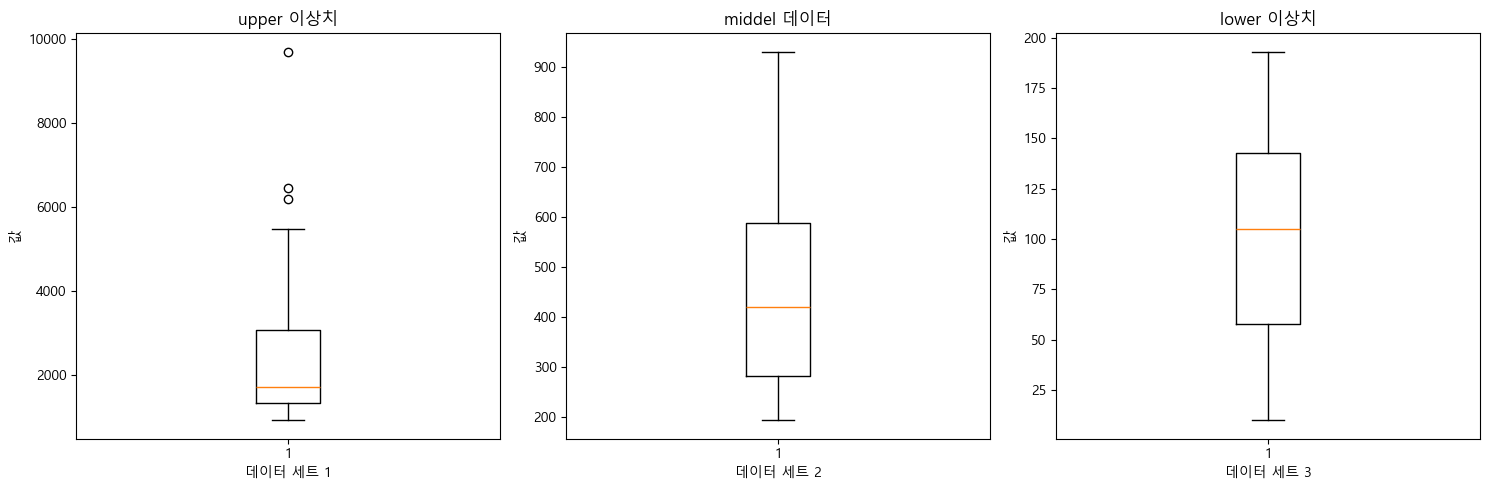

In [55]:
# 서브플롯 생성 (1행 3열)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# 각 서브플롯에 박스플롯 그리기
axes[0].boxplot(food_df_upper['Participants'])
axes[0].set_title('upper 이상치')
axes[0].set_xlabel('데이터 세트 1')
axes[0].set_ylabel('값')

axes[1].boxplot(food_df_middle['Participants'])
axes[1].set_title('middel 데이터')
axes[1].set_xlabel('데이터 세트 2')
axes[1].set_ylabel('값')

axes[2].boxplot(food_df_lower['Participants'])
axes[2].set_title('lower 이상치')
axes[2].set_xlabel('데이터 세트 3')
axes[2].set_ylabel('값')

# 서브플롯 간 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

관광 카테고리보다 비교적 잘 나눠짐

---

## 2. 군집분석
- 군집분석을 통한 그룹화 시도
- 군집 분석으로 군집화한 뒤 각 군집별 공통 속성을 찾아내는 시도
- 군집화 기준 -> 네이버 리뷰 '이런 점이 좋았어요'의 수치
    - 관광 : 편의, 매력도, 만족도
    - 음식 : 가격 및 가치, 서비스, 시설 및 분위기, 음식의 속성

Category '관광' 시도

In [56]:
tour_df_cluster = tour_df[['Attraction','만족도', '매력도', '편의']]
tour_df_cluster[:5]

,Attraction,만족도,매력도,편의
0,104고지전적비,63.0,228.0,72.0
1,10꼬르소꼬모 청담점,68.0,55.0,66.0
2,63아트,82.0,275.0,156.0
3,AK PLAZA 홍대,575.0,303.0,471.0
4,IFC몰,1608.0,513.0,1854.0


In [57]:
tour_df_cluster.describe()

,만족도,매력도,편의
count,336.000000,336.000000,336.000000
mean,335.154762,743.196429,526.241071
std,855.015573,3588.258759,1623.524886
min,0.000000,0.000000,0.000000
25%,5.750000,22.750000,18.000000
50%,33.000000,67.500000,53.000000
75%,143.500000,276.750000,186.250000
max,6388.000000,50037.000000,12165.000000


각 속성별 분산이 큼 >> 비교를 위해 정규화 시도
- 로그 정규화 채택(StandardScaler, Min-Max >> 최소와 최대간의 격차가 심할때 왜곡이 일어날 수 있어서 탈락)
    - 데이터가 모두 양수이고 관광지간의 상대적 비교만 일어나면 되기 때문에 로그 정규화 채택

In [58]:
import numpy as np
tour_df_cluster['만족도_log'] = np.log1p(tour_df_cluster['만족도'])
tour_df_cluster['매력도_log'] = np.log1p(tour_df_cluster['매력도'])
tour_df_cluster['편의_log'] = np.log1p(tour_df_cluster['편의'])
tour_df_cluster

,Attraction,만족도,매력도,편의,만족도_log,매력도_log,편의_log
0,104고지전적비,63.0,228.0,72.0,4.158883,5.433722,4.290459
1,10꼬르소꼬모 청담점,68.0,55.0,66.0,4.234107,4.025352,4.204693
2,63아트,82.0,275.0,156.0,4.418841,5.620401,5.056246
3,AK PLAZA 홍대,575.0,303.0,471.0,6.356108,5.717028,6.156979
4,IFC몰,1608.0,513.0,1854.0,7.383368,6.242223,7.525640
...,...,...,...,...,...,...,...
331,홍난파가옥,2.0,22.0,9.0,1.098612,3.135494,2.302585
332,화곡본동시장,7.0,11.0,8.0,2.079442,2.484907,2.197225
333,화랑대 철도공원,4.0,92.0,60.0,1.609438,4.532599,4.110874
334,황궁우,1.0,35.0,14.0,0.693147,3.583519,2.708050


시각화

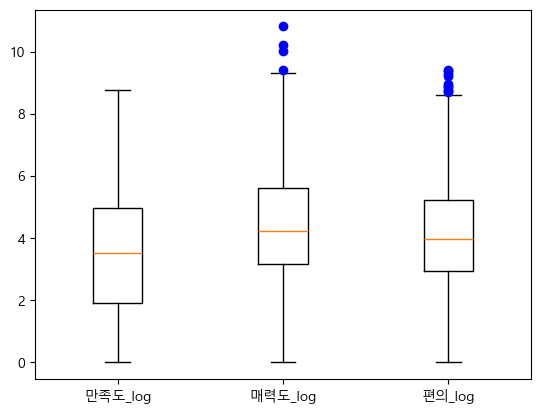

In [59]:
import matplotlib.pyplot as plt

# fig, ax = plt.subplots()  # 이 부분은 필요 없습니다.
# ax.boxplot()  # 이 부분도 필요 없습니다.

fig, ax = plt.subplots()

# 로그 변환된 데이터 배열을 박스 플롯에 전달합니다.
ax.boxplot([tour_df_cluster['만족도_log'], tour_df_cluster['매력도_log'], tour_df_cluster['편의_log']], sym='bo')

# x축 레이블 설정
plt.xticks([1, 2, 3], ['만족도_log', '매력도_log', '편의_log'])

# 플롯 표시
plt.show()

로그 변환된 수치데이터를 기준으로 군집 분석 시도

In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

x_features = tour_df_cluster[['만족도_log', '매력도_log', '편의_log']].values

적절한 클러스터 개수를 찾기 위해 Elbow 기법 활용

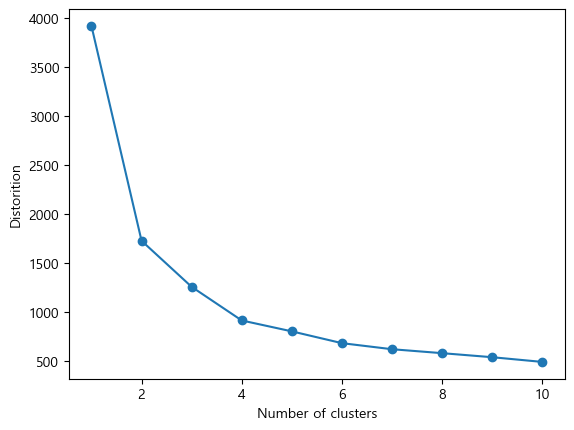

In [61]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()

# x_features_sc = sc.fit_transform(x_features)
# 로그 정규화된 값을 굳이 또 표준정규화 시켜줄 필요있을까??

# Elbow

distortions = []

for i in range(1,11):
    kmeans_i = KMeans(n_clusters = i, random_state=42) #모델 생성
    kmeans_i.fit(x_features) #모델 훈련(비지도학습 (라벨 x))
    distortions.append(kmeans_i.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distorition')

plt.show()

그래프가 급격히 감소하다 완만해지는 구간인 3~4 구간을 클러스터 개수로 지정하여 진행

3과 4의 실루엣 점수를 보고 최적의 군집 개수 지정

In [62]:

# 실루엣 점수 구하는 함수 정의
from matplotlib import cm
def silhouetteviz(n_cluster, x_features):
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    y_labels = kmeans.fit_predict(x_features)
    silhouette_values = silhouette_samples(x_features, y_labels, metric='euclidean')

    # 초기화
    y_ax_lower, y_ax_upper = 0, 0
    y_ticks=[]

    for c in range(n_cluster):
        c_silhouette = silhouette_values[y_labels == c]
        c_silhouette.sort()
        y_ax_upper += len(c_silhouette)
        color = cm.jet(float(c)/n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette,
                 height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette)
    silhouetter_avg = np.mean(silhouette_values)
    # print(silhouetter_avg)

    # 그래프 꾸며주는 코드
    plt.axvline(silhouetter_avg, color='red', linestyle='--') # 실루엣 평균 점수 선 표시
    plt.title('Number of Cluster: '+str(n_cluster)+'\n'\
              + 'Silhouette_score: ' +str(round(silhouetter_avg, 3)))
    
    plt.yticks(y_ticks, range(n_cluster))
    plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

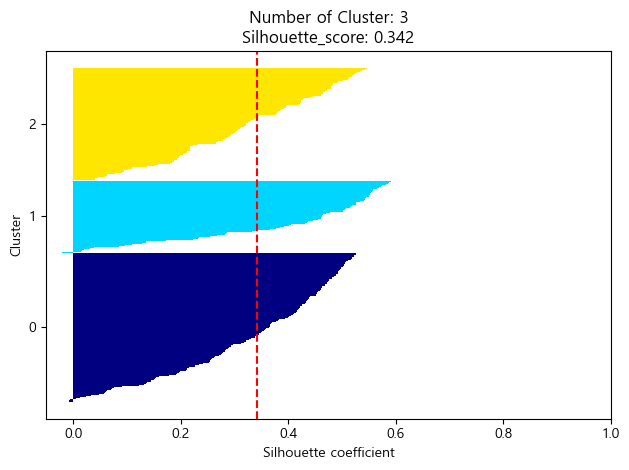

In [63]:
silhouetteviz(3, x_features)

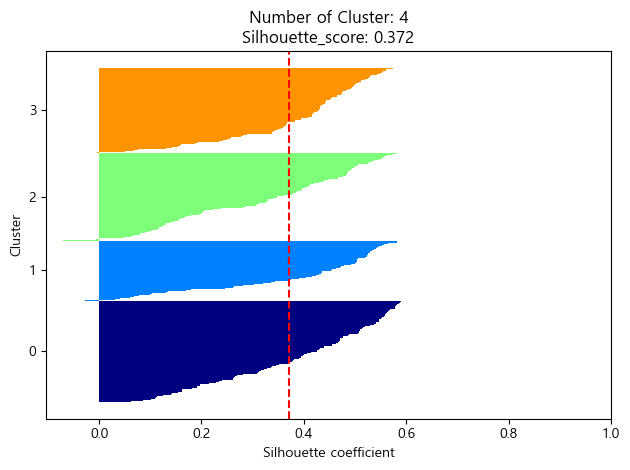

In [64]:
silhouetteviz(4, x_features)

- 군집 개수 3일 때 실루엣 점수 : 0.342
- 군집 개수 4일 때 실루엣 점수 : 0.372
    - 군집 개수가 4개일때 실루엣점수가 더 높다

In [65]:
# cluster 개수 4일때
kmeans = KMeans(n_clusters = 4 , random_state=42)

# 예측된 cluster 라벨링 해주기
y_labels = kmeans.fit_predict(x_features)
tour_df_cluster['cluster_label'] = y_labels

# 군집별 개수 확인
tour_df_cluster['cluster_label'].value_counts()

cluster_label
0    102
2     88
3     86
1     60
Name: count, dtype: int64

군집 분석 시각화

In [66]:
# 군집 분석 후 시각화해주는 함수
def clusterScatter(n_cluster, x_features, att1, att2):
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    y_labels = kmeans.fit_predict(x_features)

    for i in range(n_cluster):
        c_color = cm.jet(float(i)/n_cluster)
        c_colors.append(c_color)
        # 클러스터 색상 설정

        # cluster 내 데이터 분포를 표현, centroid 동그라미로 시각화
        plt.scatter(x_features[y_labels ==i, att1], x_features[y_labels ==i, att2],
                    marker ='o', color=c_color, edgecolor='black' , s=50,
                    label='cluster'+str(i)
                    )
        # 각 클러스터의 중심점(centroid) 별(*)로 표시
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,att1],kmeans.cluster_centers_[i,att2],
                    marker='*', color=c_colors[i], edgecolor='w', s=100)

    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

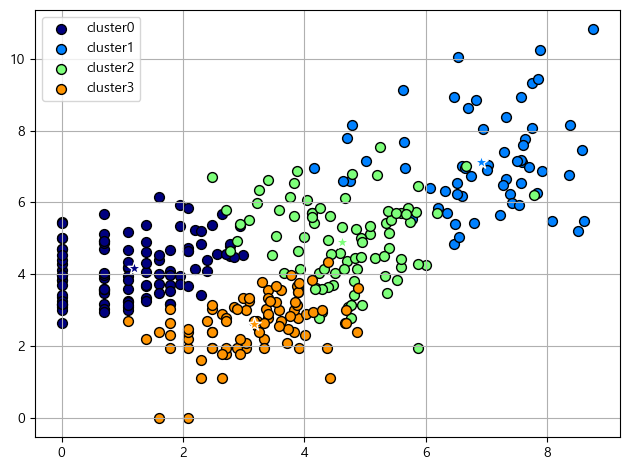

In [67]:
clusterScatter(4, x_features, 0, 1) 

군집별 공통 속성 테이블 만들기

In [68]:
tour_df_cluster

,Attraction,만족도,매력도,편의,만족도_log,매력도_log,편의_log,cluster_label
0,104고지전적비,63.0,228.0,72.0,4.158883,5.433722,4.290459,2
1,10꼬르소꼬모 청담점,68.0,55.0,66.0,4.234107,4.025352,4.204693,2
2,63아트,82.0,275.0,156.0,4.418841,5.620401,5.056246,2
3,AK PLAZA 홍대,575.0,303.0,471.0,6.356108,5.717028,6.156979,1
4,IFC몰,1608.0,513.0,1854.0,7.383368,6.242223,7.525640,1
...,...,...,...,...,...,...,...,...
331,홍난파가옥,2.0,22.0,9.0,1.098612,3.135494,2.302585,0
332,화곡본동시장,7.0,11.0,8.0,2.079442,2.484907,2.197225,3
333,화랑대 철도공원,4.0,92.0,60.0,1.609438,4.532599,4.110874,0
334,황궁우,1.0,35.0,14.0,0.693147,3.583519,2.708050,0


In [69]:
tour_df_cluster_group = tour_df_cluster.drop(['Attraction'], axis=1)

In [70]:
tour_df_cluster_group.groupby('cluster_label').mean()

,만족도,매력도,편의,만족도_log,매력도_log,편의_log
cluster_label,,,,,,
0,3.911765,89.568627,52.225490,1.201059,4.179037,3.621335
1,1582.266667,3626.833333,2589.400000,6.914055,7.121809,7.231497
2,164.920455,244.875000,169.022727,4.625972,4.912585,4.770319
3,32.139535,16.500000,14.558140,3.164971,2.609748,2.345857


Category '음식' 시도

In [71]:
food_df[:5]

,Attraction,가격 및 가치,서비스,시설 및 분위기,음식의 속성,Participants,Address,Tag,Longitude,Latitude
0,1940금문,6.0,43.0,79.0,210.0,122,서울특별시 종로구 창경궁로 269-1 1940금문,#1940금문#금문#대학로노포맛집#대학로자장면#맛있는녀석들시청자추천맛집#맛있는녀석들...,127.000610,37.585407
1,63뷔페 파빌리온,2372.0,1974.0,7101.0,6137.0,4359,"서울특별시 영등포구 63로 50 한화금융센터63,GF",#63빌딩#63빌딩파빌리온#맛집#뷔페식#송년모임#연말모임#음식#파빌리온,126.939587,37.519808
2,BK볏짚 우대갈비 장안동본점,62.0,285.0,551.0,887.0,526,서울특별시 동대문구 장한로26가길 29 1층 BK볏짚 우대갈비 장안동본점,#BK볏짚 우대갈비 장안동본점#동대문맛집#동대문맛집#비케이우대갈비#우대갈비맛집#음식...,127.071611,37.570591
3,RSG 성수,0.0,2.0,17.0,13.0,12,서울특별시 성동구 연무장15길 11 C동 110호,#RSG#RSG성수#라이더성지#라이더카페#라이딩편집숍#서울라이더성지#음식,127.059921,37.542477
4,WANGTHAI,31.0,173.0,342.0,567.0,324,서울특별시 용산구 이태원로 151,#맛집#분위기_좋은#얌꿍#얌운센#음식#이국적인#팟타이가이,126.990646,37.534500


In [72]:
food_df_cluster = food_df[['Attraction','가격 및 가치', '서비스', '시설 및 분위기', '음식의 속성']]
food_df_cluster[:5]

,Attraction,가격 및 가치,서비스,시설 및 분위기,음식의 속성
0,1940금문,6.0,43.0,79.0,210.0
1,63뷔페 파빌리온,2372.0,1974.0,7101.0,6137.0
2,BK볏짚 우대갈비 장안동본점,62.0,285.0,551.0,887.0
3,RSG 성수,0.0,2.0,17.0,13.0
4,WANGTHAI,31.0,173.0,342.0,567.0


In [73]:
food_df_cluster.describe()

,가격 및 가치,서비스,시설 및 분위기,음식의 속성
count,449.000000,449.000000,449.000000,449.000000
mean,143.102450,228.438753,724.026726,1271.122494
std,271.191803,286.814013,1242.363854,1807.458753
min,0.000000,2.000000,6.000000,10.000000
25%,23.000000,62.000000,122.000000,258.000000
50%,50.000000,137.000000,310.000000,631.000000
75%,138.000000,263.000000,790.000000,1379.000000
max,2372.000000,1974.000000,10410.000000,15718.000000


In [74]:
# 로그 정규화
food_df_cluster['가격 및 가치_log'] = np.log1p(food_df_cluster['가격 및 가치'])
food_df_cluster['서비스_log'] = np.log1p(food_df_cluster['서비스'])
food_df_cluster['시설 및 분위기_log'] = np.log1p(food_df_cluster['시설 및 분위기'])
food_df_cluster['음식의 속성_log'] = np.log1p(food_df_cluster['음식의 속성'])
food_df_cluster

,Attraction,가격 및 가치,서비스,시설 및 분위기,음식의 속성,가격 및 가치_log,서비스_log,시설 및 분위기_log,음식의 속성_log
0,1940금문,6.0,43.0,79.0,210.0,1.945910,3.784190,4.382027,5.351858
1,63뷔페 파빌리온,2372.0,1974.0,7101.0,6137.0,7.771910,7.588324,8.868132,8.722254
2,BK볏짚 우대갈비 장안동본점,62.0,285.0,551.0,887.0,4.143135,5.655992,6.313548,6.788972
3,RSG 성수,0.0,2.0,17.0,13.0,0.000000,1.098612,2.890372,2.639057
4,WANGTHAI,31.0,173.0,342.0,567.0,3.465736,5.159055,5.837730,6.342121
...,...,...,...,...,...,...,...,...,...
444,황금정원,172.0,254.0,1520.0,2009.0,5.153292,5.541264,7.327123,7.605890
445,황생가칼국수,323.0,921.0,1891.0,5523.0,5.780744,6.826545,7.545390,8.616858
446,황토추어탕,224.0,154.0,273.0,750.0,5.416100,5.043425,5.613128,6.621406
447,희락갈치,610.0,603.0,525.0,3215.0,6.415097,6.403574,6.265301,8.075894


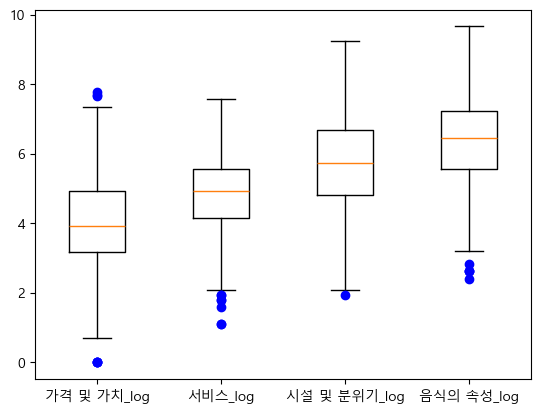

In [75]:
fig, ax = plt.subplots()

# 로그 변환된 데이터 배열을 박스 플롯에 전달합니다.
ax.boxplot([food_df_cluster['가격 및 가치_log'], food_df_cluster['서비스_log'], food_df_cluster['시설 및 분위기_log'], food_df_cluster['음식의 속성_log']], sym='bo')

# x축 레이블 설정
plt.xticks([1, 2, 3, 4], ['가격 및 가치_log', '서비스_log', '시설 및 분위기_log', '음식의 속성_log'])

# 플롯 표시
plt.show()

In [76]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

x_features2 = food_df_cluster[['가격 및 가치_log', '서비스_log', '시설 및 분위기_log', '음식의 속성_log']].values

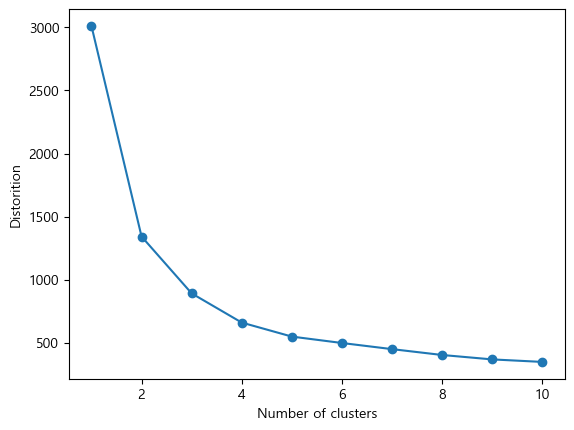

In [77]:
# Elbow

distortions = []

for i in range(1,11):
    kmeans_i = KMeans(n_clusters = i, random_state=42) #모델 생성
    kmeans_i.fit(x_features2) #모델 훈련(비지도학습 (라벨 x))
    distortions.append(kmeans_i.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distorition')

plt.show()

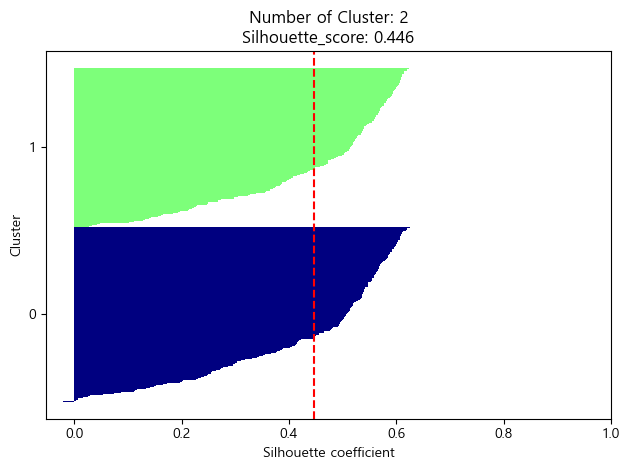

In [78]:
silhouetteviz(2, x_features2)

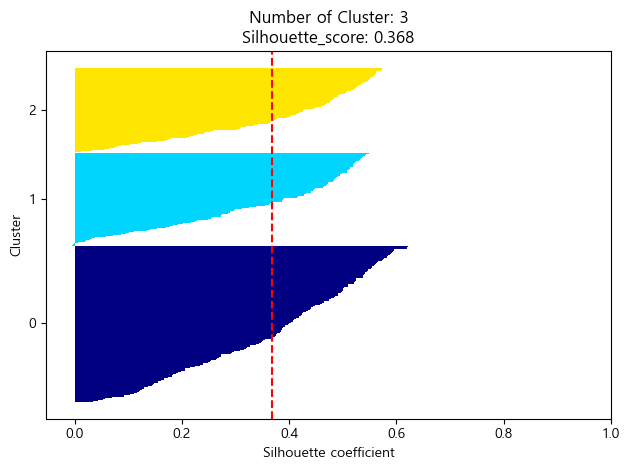

In [79]:
silhouetteviz(3, x_features2)

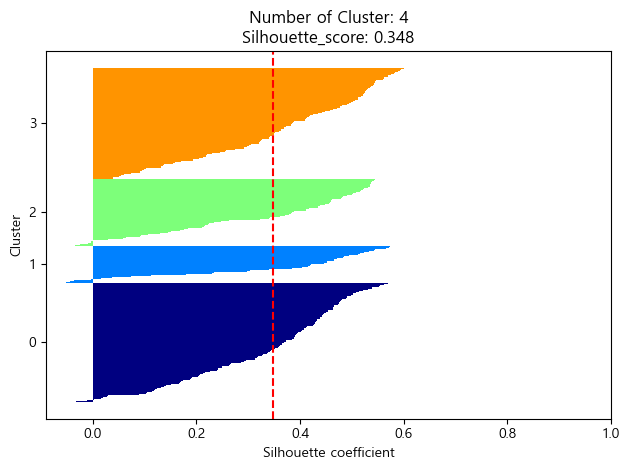

In [80]:
silhouetteviz(4, x_features2)

- 군집 개수 2일 때 실루엣 점수 : 0.446
- 군집 개수 3일 때 실루엣 점수 : 0.368
- 군집 개수 4일 때 실루엣 점수 : 0.348
    - 군집 개수가 3개일때 실루엣점수가 더 높다

In [81]:
# cluster 개수 3일때
kmeans = KMeans(n_clusters = 3 , random_state=42)

# 예측된 cluster 라벨링 해주기
y_labels = kmeans.fit_predict(x_features2)
food_df_cluster['cluster_label'] = y_labels

# 군집별 개수 확인
food_df_cluster['cluster_label'].value_counts()

cluster_label
0    210
1    124
2    115
Name: count, dtype: int64

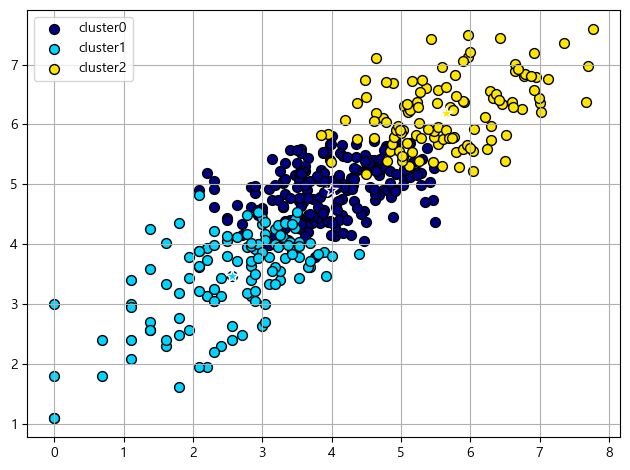

In [82]:
clusterScatter(3, x_features2, 0 ,1)

In [83]:
food_df_cluster

,Attraction,가격 및 가치,서비스,시설 및 분위기,음식의 속성,가격 및 가치_log,서비스_log,시설 및 분위기_log,음식의 속성_log,cluster_label
0,1940금문,6.0,43.0,79.0,210.0,1.945910,3.784190,4.382027,5.351858,1
1,63뷔페 파빌리온,2372.0,1974.0,7101.0,6137.0,7.771910,7.588324,8.868132,8.722254,2
2,BK볏짚 우대갈비 장안동본점,62.0,285.0,551.0,887.0,4.143135,5.655992,6.313548,6.788972,0
3,RSG 성수,0.0,2.0,17.0,13.0,0.000000,1.098612,2.890372,2.639057,1
4,WANGTHAI,31.0,173.0,342.0,567.0,3.465736,5.159055,5.837730,6.342121,0
...,...,...,...,...,...,...,...,...,...,...
444,황금정원,172.0,254.0,1520.0,2009.0,5.153292,5.541264,7.327123,7.605890,2
445,황생가칼국수,323.0,921.0,1891.0,5523.0,5.780744,6.826545,7.545390,8.616858,2
446,황토추어탕,224.0,154.0,273.0,750.0,5.416100,5.043425,5.613128,6.621406,0
447,희락갈치,610.0,603.0,525.0,3215.0,6.415097,6.403574,6.265301,8.075894,2


In [84]:
food_df_cluster_group = food_df_cluster.drop(['Attraction'], axis=1)

In [85]:
food_df_cluster_group.groupby('cluster_label').mean()

,가격 및 가치,서비스,시설 및 분위기,음식의 속성,가격 및 가치_log,서비스_log,시설 및 분위기_log,음식의 속성_log
cluster_label,,,,,,,,
0,68.161905,148.347619,433.490476,714.771429,3.985037,4.912708,5.814293,6.450317
1,16.862903,39.225806,96.266129,160.298387,2.565947,3.468889,4.242756,4.845328
2,416.069565,578.713043,1931.460870,3484.826087,5.656638,6.189558,7.209238,7.959757


## 3. 텍스트 분석을 통한 관광지 분류
- 한국 관광 공사가 운영하는 구석구석 사이트의 관광지별 해시태그를 분석
- 카테고리(관광 / 음식) 별 세부 유형 지정 후 해시태그 토큰을 유형에 맞게 분류
    - 카테고리별 세부 유형 지정은 학술지, 관광 공사 분류 자료, 논문을 참고하여 지정
- 분류된 해시태그 토큰을 기준으로 관광지 유형 지정

In [86]:
tour_df[:5]

,Attraction,만족도,매력도,편의,Participants,Address,Tag,Longitude,Latitude
0,104고지전적비,63.0,228.0,72.0,203,서울특별시 서대문구 연희동 산100-1,#관광지#기념탑#역사#역사공부#역사관광지#역사를품은곳#역사문화재#역사속#역사속으로#...,126.926214,37.567794
1,10꼬르소꼬모 청담점,68.0,55.0,66.0,76,"서울특별시 강남구 압구정로 416 (청담동) 1층, 2층",#10꼬르소꼬모#10꼬르소꼬모청담점#강남브런치카페#쇼핑#음식#청담동카페#청담동편집숍...,127.042493,37.527056
2,63아트,82.0,275.0,156.0,252,서울특별시 영등포구 63로 50,#63빌딩전시관#63빌딩전시회#63스퀘어#63아트#경치좋은곳#문화공간#문화시설#문화...,126.940253,37.520002
3,AK PLAZA 홍대,575.0,303.0,471.0,756,서울특별시 마포구 양화로 188,#2024_여행가는달과함께하는_발도장여행지#AK&홍대#쇼핑#홍대쇼핑몰,126.926095,37.558187
4,IFC몰,1608.0,513.0,1854.0,1986,서울특별시 영등포구 여의도동 국제금융로 10 서울 국제금융 센터,#IFC몰#복합쇼핑몰#쇼핑#수도권#여의도대형쇼핑몰#여의도복합쇼핑몰#여의도쇼핑#여의도...,126.925583,37.524850


In [87]:
food_df[:5]

,Attraction,가격 및 가치,서비스,시설 및 분위기,음식의 속성,Participants,Address,Tag,Longitude,Latitude
0,1940금문,6.0,43.0,79.0,210.0,122,서울특별시 종로구 창경궁로 269-1 1940금문,#1940금문#금문#대학로노포맛집#대학로자장면#맛있는녀석들시청자추천맛집#맛있는녀석들...,127.000610,37.585407
1,63뷔페 파빌리온,2372.0,1974.0,7101.0,6137.0,4359,"서울특별시 영등포구 63로 50 한화금융센터63,GF",#63빌딩#63빌딩파빌리온#맛집#뷔페식#송년모임#연말모임#음식#파빌리온,126.939587,37.519808
2,BK볏짚 우대갈비 장안동본점,62.0,285.0,551.0,887.0,526,서울특별시 동대문구 장한로26가길 29 1층 BK볏짚 우대갈비 장안동본점,#BK볏짚 우대갈비 장안동본점#동대문맛집#동대문맛집#비케이우대갈비#우대갈비맛집#음식...,127.071611,37.570591
3,RSG 성수,0.0,2.0,17.0,13.0,12,서울특별시 성동구 연무장15길 11 C동 110호,#RSG#RSG성수#라이더성지#라이더카페#라이딩편집숍#서울라이더성지#음식,127.059921,37.542477
4,WANGTHAI,31.0,173.0,342.0,567.0,324,서울특별시 용산구 이태원로 151,#맛집#분위기_좋은#얌꿍#얌운센#음식#이국적인#팟타이가이,126.990646,37.534500


### Tag 분석 과정
- 토큰화 : Tag 전처리 > '#' 기준 split 한 뒤 형태소 분석
- 정제
    - 형태소 추출 : 명사 단어만 추출 > KoNLPy 에서 제공하는 형태소 분석기 중 우리 프로젝트에 가장 적합한 형태소 분석기 채택할 예정(Komoran, Okt, Hannanum, Kkma)
    - 클리닝
        - 빈도수에 따라서 클리닝(모든 관광지에 등장하거나 한개 이하의 관광지에만 등장하는 단어 제거)
        - 같은 의미의 단어 클리닝(예 - 산책길, 산책로 >> 산책길로 통합)
- 불용어 처리 : 우리 프로젝트에서 활용 가능한 stopswords 유즈케이스 존재하지 않음 >> 우리 프로젝트에 맞는 stopswords 제작
    - 기준 : 정제된 단어 중 클리닝을 거쳤는데도 카테고리별 세부 유형의 속성을 나타낸다고 보기 힘든 단어는 불용어로 정의
- 분류 작업 : 위의 과정에서 살아남은 단어들로 카테고리별 세부 유형에 맞게 분류
- 관광지 유형 지정 : 분류된 단어를 기준으로 관광지별 유형 단어 카운트 진행 > 가장 많이 등장하는 유형을 해당 관광지의 유형으로 지정
- 유형 지정 검증 : 교차 검증(네이버 subclass를 기준으로 나눈 것과 교차 검증하여 일치율 확인)

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import json
import re
import matplotlib

# 한글 품사 태깅을 위한 모듈
from konlpy.tag import Okt
from collections import Counter
from matplotlib import font_manager, rc
from wordcloud import WordCloud

plt.rcParams['font.family'] = 'NanumGothic'

In [89]:
file2 = '../변수정리/csv파일/final_data_set_v3.csv'

In [90]:
raw1 = pd.read_csv(file2, index_col=0)
df1 = raw1.copy()
df1.head(1)

,Attraction,Category,type,Category_Map,Category_Map_v2,Good_Point,Selected_People,Selected_People_Ratio,Participants,Address,Tag,Longitude,Latitude,Image Link
0,104고지전적비,관광,history,매력도,분위기,사진이 잘 나와요,91.0,0.250689,203,서울특별시 서대문구 연희동 산100-1,#관광지#기념탑#역사#역사공부#역사관광지#역사를품은곳#역사문화재#역사속#역사속으로#...,126.926214,37.567794,https://dbscthumb-phinf.pstatic.net/2765_000_1...


In [91]:
# 아직 분류 전 DF : 사용할 Tag만 사용
df_tag = df1[['Attraction', 'Category', 'Tag']].drop_duplicates().reset_index(drop=True)
print(df_tag.shape)
df_tag.head(2)

(785, 3)


,Attraction,Category,Tag
0,104고지전적비,관광,#관광지#기념탑#역사#역사공부#역사관광지#역사를품은곳#역사문화재#역사속#역사속으로#...
1,10꼬르소꼬모 청담점,관광,#10꼬르소꼬모#10꼬르소꼬모청담점#강남브런치카페#쇼핑#음식#청담동카페#청담동편집숍...


In [92]:
df_tag['Category'].value_counts()

Category
음식    449
관광    336
Name: count, dtype: int64

In [93]:
df_tag_tour = df_tag[df_tag['Category'] == '관광']
df_tag_food = df_tag[df_tag['Category'] == '음식']

In [94]:
# 함수 만들기
def make_newTagCols(df, nlp):
    # tag 분리한거 담는 컬럼 만들기
    df[['newTag', 'newTag_list', 'tag_word_N']] = None
    # 모든 태그 모음집
    total = ''
    # 모든 태그의 명사 추출 모음집
    N_list = []

    # '#' 분리해서 컬럼에 담기
    for i, tag in enumerate(df.Tag):
        tag = tag.split('#')[1:]
        df['newTag_list'][i] = tag
    
        words = ''
        for t in tag:
            words = words + t + ' '
    
        total = total + words + ' '
        df['newTag'][i] = words

        # 명사 추출해서 또 새로운 컬럼에 담기
        newTag_N = list(set(nlp.nouns(words)))
        N_list.append(newTag_N)
        df['tag_word_N'][i] = newTag_N
        
    # '#'제거 해시태그 한 리스트에 모은 것 : total
    # total에서 명사 추출한 결과
    total_nouns = nlp.nouns(total)

    return df, total, N_list, total_nouns

In [95]:
# 한글 단어 구분
nlp = Okt()

df_tag_tour, total_word, newTag_N_list, total_nouns = make_newTagCols(df_tag_tour, nlp)

In [96]:
df_tag_tour.head(2)

,Attraction,Category,Tag,newTag,newTag_list,tag_word_N
0,104고지전적비,관광,#관광지#기념탑#역사#역사공부#역사관광지#역사를품은곳#역사문화재#역사속#역사속으로#...,관광지 기념탑 역사 역사공부 역사관광지 역사를품은곳 역사문화재 역사속 역사속으로 역...,"[관광지, 기념탑, 역사, 역사공부, 역사관광지, 역사를품은곳, 역사문화재, 역사속...","[곳, 한국, 기념, 관광지, 문화재, 유적지, 해병대, 여행, 전쟁, 역사탐방, ..."
1,10꼬르소꼬모 청담점,관광,#10꼬르소꼬모#10꼬르소꼬모청담점#강남브런치카페#쇼핑#음식#청담동카페#청담동편집숍...,10꼬르소꼬모 10꼬르소꼬모청담점 강남브런치카페 쇼핑 음식 청담동카페 청담동편집숍 ...,"[10꼬르소꼬모, 10꼬르소꼬모청담점, 강남브런치카페, 쇼핑, 음식, 청담동카페, ...","[편집, 브런치, 꼬르소꼬, 카페, 청담동, 꼬르소꼬모, 점, 강남, 청담, 숍, ..."


In [97]:
count = Counter(total_nouns)
count

Counter({'여행': 393,
         '역사': 281,
         '관광지': 182,
         '곳': 180,
         '휴식': 179,
         '서울': 159,
         '공원': 151,
         '시장': 145,
         '쇼핑': 141,
         '아이': 136,
         '문화': 120,
         '체험': 110,
         '가족': 108,
         '박물관': 103,
         '산책': 97,
         '친구': 96,
         '전통': 93,
         '연인': 92,
         '수도권': 78,
         '여행지': 77,
         '관광': 76,
         '공간': 74,
         '한국': 67,
         '데이트': 63,
         '도심': 62,
         '선': 60,
         '코스': 58,
         '자연': 58,
         '실내': 57,
         '힐링': 54,
         '시설': 53,
         '나들이': 53,
         '속': 49,
         '체험학습': 42,
         '여행가': 36,
         '는달': 36,
         '발도장': 36,
         '재래시장': 35,
         '한강': 33,
         '이색': 32,
         '교과서': 30,
         '유적지': 29,
         '남녀': 29,
         '노소': 29,
         '당일치기': 29,
         '투어': 28,
         '근교': 27,
         '야경': 25,
         '사계절': 25,
         '이야기': 24,
         '피크닉': 24,
 

In [98]:
# 상위 빈출 단어 10개 구하는 코드
count.most_common(10)

[('여행', 393),
 ('역사', 281),
 ('관광지', 182),
 ('곳', 180),
 ('휴식', 179),
 ('서울', 159),
 ('공원', 151),
 ('시장', 145),
 ('쇼핑', 141),
 ('아이', 136)]

In [99]:
word_count = dict()

# 빈출 단어 50위까지 word_count에 넣어주는 코드
for tag, counts in count.most_common(50):
    if (len(str(tag))>1):
        word_count[tag] = counts
        print(f'{tag} : {counts}')

여행 : 393
역사 : 281
관광지 : 182
휴식 : 179
서울 : 159
공원 : 151
시장 : 145
쇼핑 : 141
아이 : 136
문화 : 120
체험 : 110
가족 : 108
박물관 : 103
산책 : 97
친구 : 96
전통 : 93
연인 : 92
수도권 : 78
여행지 : 77
관광 : 76
공간 : 74
한국 : 67
데이트 : 63
도심 : 62
코스 : 58
자연 : 58
실내 : 57
힐링 : 54
시설 : 53
나들이 : 53
체험학습 : 42
여행가 : 36
는달 : 36
발도장 : 36
재래시장 : 35
한강 : 33
이색 : 32
교과서 : 30
유적지 : 29
남녀 : 29
노소 : 29
당일치기 : 29
투어 : 28
근교 : 27
야경 : 25
사계절 : 25
이야기 : 24


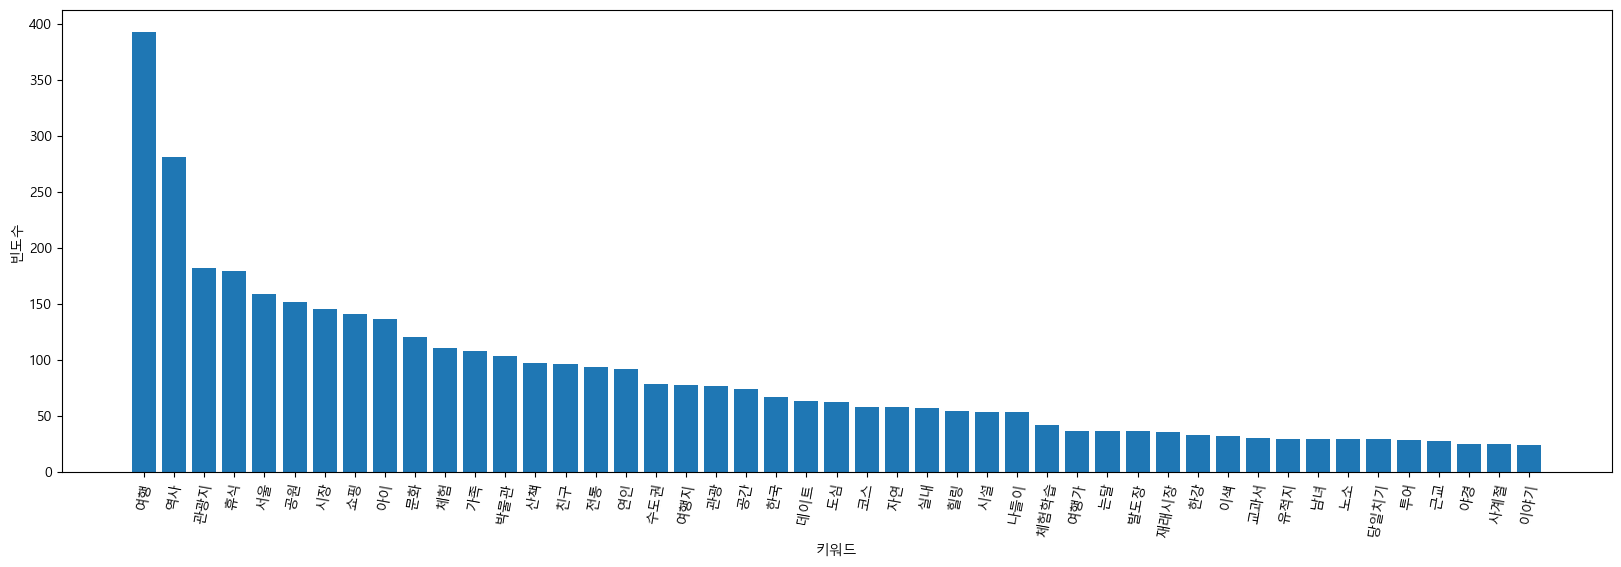

In [100]:
font_path = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family = font_name)

plt.figure(figsize = (20, 6))
plt.xlabel('키워드')
plt.ylabel('빈도수')
# plt.grid(True)

sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)

plt.bar(range(len(word_count)), sorted_Values, align = 'center')

plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 80)
plt.show()